<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/wine%ED%92%88%EC%A7%88%EB%B6%84%EB%A5%98-%EC%A0%84%EC%B2%98%EB%A6%AC%EB%A7%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**와인 품질(Quality) 분류 경진대회**
1. train.csv / test.csv
###데이터분류
* index 구분자
* quality 품질
* fixed acidity 산도
* volatile acidity 휘발성산
* citric acid 시트르산
* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
* chlorides 염화물
* free sulfur dioxide 독립 이산화황
* total sulfur dioxide 총 이산화황
* density 밀도
* pH 수소이온농도
* sulphates 황산염
* alcohol 도수
* type 종류

> - 데이터전처리/시각화
- 분류모델 3가지이상 적용

###**1. 데이터셋 불러오기**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
file_uploaded=files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
smpl_sub = pd.read_csv("sample_submission.csv")

* 데이터 형태 확인하기

In [4]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [5]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [7]:
train.nunique().sort_values(ascending=True)

type                       2
quality                    7
citric acid               89
alcohol                  103
fixed acidity            106
sulphates                106
pH                       107
free sulfur dioxide      127
volatile acidity         179
chlorides                205
total sulfur dioxide     271
residual sugar           309
density                  970
index                   5497
dtype: int64

In [8]:
#소수점조절
pd.options.display.float_format = '{:.2f}'.format

In [9]:
train.sort_values(by=["quality"])

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
4254,4254,3,4.20,0.21,0.23,5.10,0.04,64.00,157.00,1.00,3.42,0.44,8.00,white
978,978,3,6.70,0.76,0.02,1.80,0.08,6.00,12.00,1.00,3.55,0.63,9.95,red
5044,5044,3,10.30,0.17,0.47,1.40,0.04,5.00,33.00,0.99,2.89,0.28,9.60,white
1568,1568,3,11.60,0.58,0.66,2.20,0.07,10.00,47.00,1.00,3.25,0.57,9.00,red
3580,3580,3,11.80,0.23,0.38,11.10,0.03,15.00,123.00,1.00,2.93,0.55,9.70,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,2194,9,6.60,0.36,0.29,1.60,0.02,24.00,85.00,0.99,3.41,0.61,12.40,white
3198,3198,9,6.90,0.36,0.34,4.20,0.02,57.00,119.00,0.99,3.28,0.36,12.70,white
2324,2324,9,9.10,0.27,0.45,10.60,0.04,28.00,124.00,1.00,3.20,0.46,10.40,white
3497,3497,9,7.10,0.26,0.49,2.20,0.03,31.00,113.00,0.99,3.37,0.42,12.90,white


###**2. EDA/전처리**

In [10]:
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [11]:
test.isnull().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

* null값이 존재하지않음


In [12]:
# 인덱스 드롭
train.drop(['index'],axis=1,inplace=True)
test.drop(['index'],axis=1,inplace=True)

**데이터시각화 살펴보기**

In [13]:
train.describe()[1:].style.background_gradient()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<Axes: xlabel='quality', ylabel='count'>

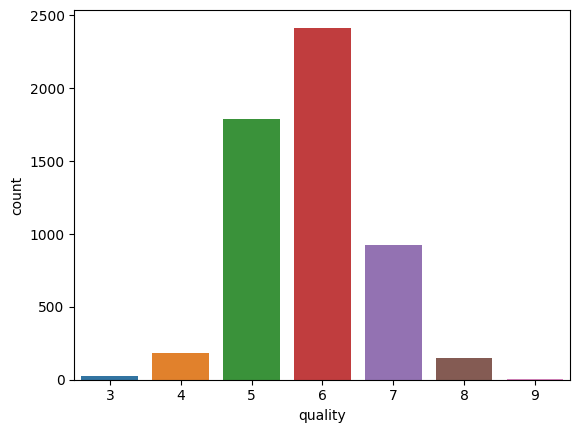

In [14]:
sns.countplot(data=train, x="quality")

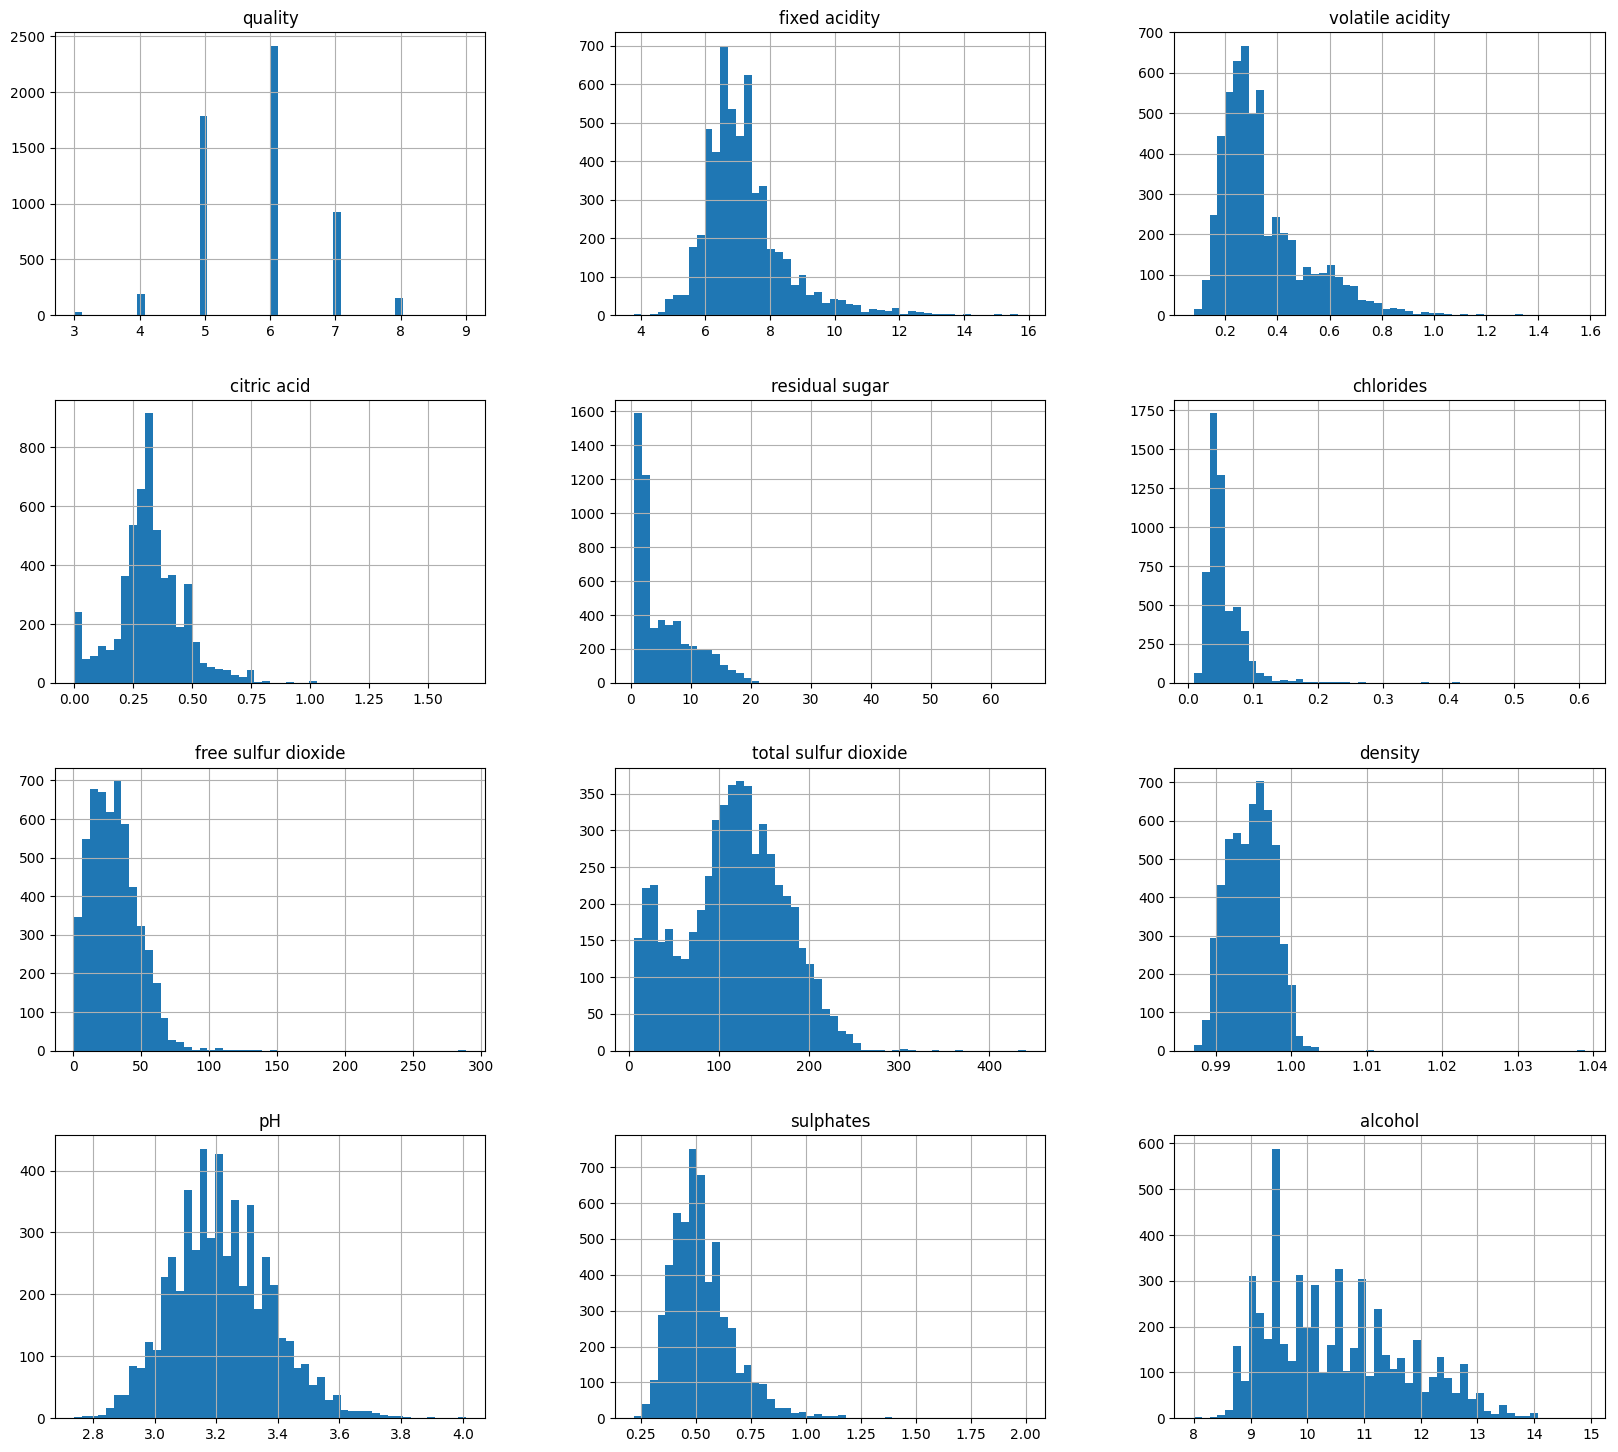

In [15]:
train_hist= train.hist(bins=50, figsize=(20, 18))

* 레이블데이터 인코딩하기-type 피처를 라벨인코딩해주기
* redwine=0, whitewine=1

In [20]:
print('인코딩전 type분포:\n',train['type'].value_counts())

인코딩전 type분포:
 1    4159
0    1338
Name: type, dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder
items = ['red','white']

#LabelEncoder를 객체로 생성후 fit()과 transfrom()으로 레이블 인코딩 수행
encoder = LabelEncoder() 
train['type']=encoder.fit_transform(train['type'])
print('인코딩후 변환값:\n',train['type'].value_counts())

인코딩후 변환값:
 1    4159
0    1338
Name: type, dtype: int64


##**3.모델링**
**RandomForest**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [26]:
X_features = train.drop(columns = 'quality',axis=1)
y_labels = train['quality']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(4397, 12), 테스트 세트 Shape:(1100, 12)
학습 세트 레이블 값 분포 비율
6   0.44
5   0.32
7   0.17
4   0.03
8   0.03
3   0.00
9   0.00
Name: quality, dtype: float64

 테스트 세트 레이블 값 분포 비율
6   0.44
5   0.33
7   0.16
4   0.04
8   0.02
3   0.00
9   0.00
Name: quality, dtype: float64


In [24]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.6745


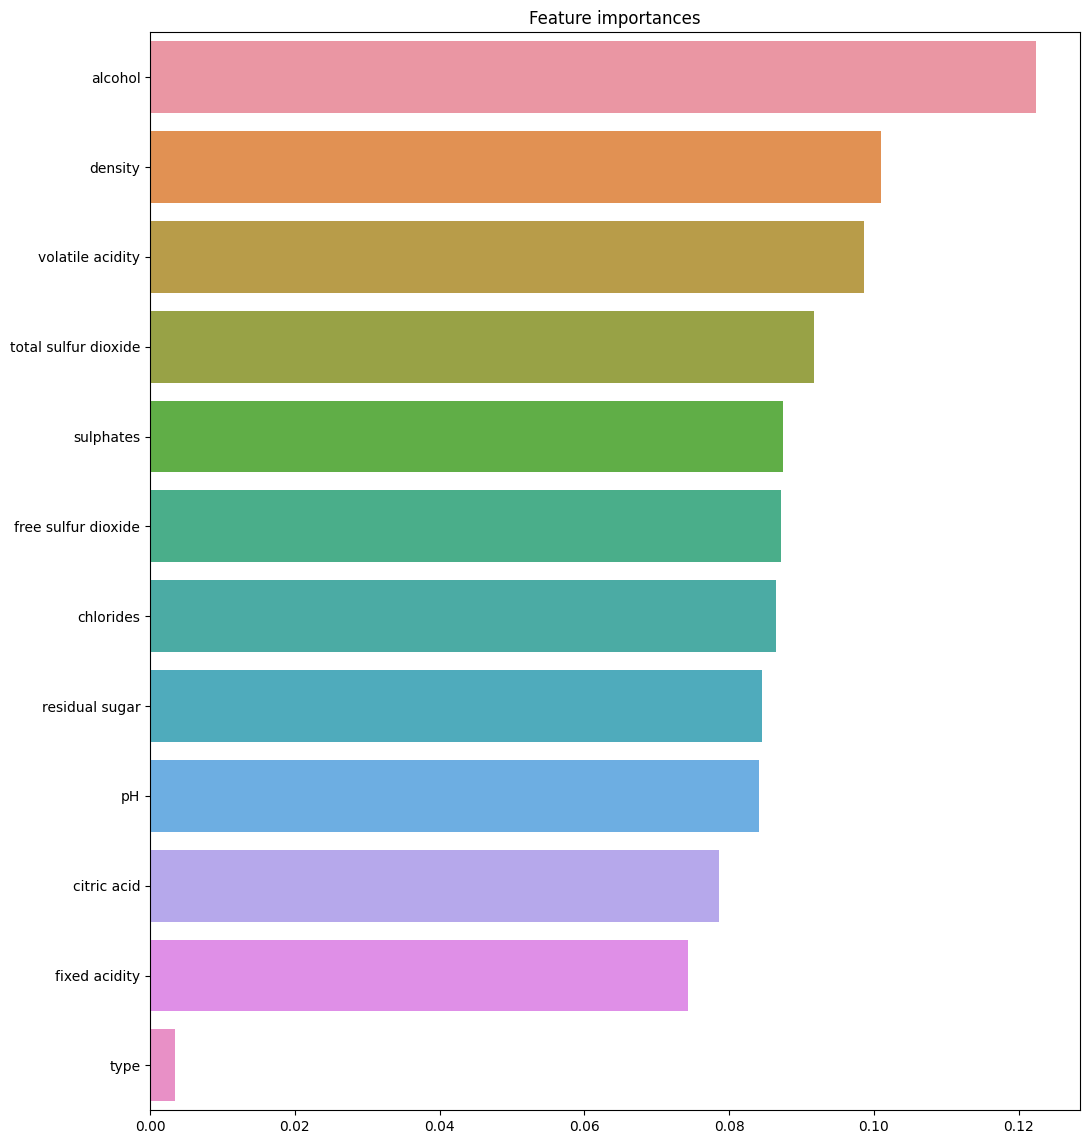

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf.feature_importances_ #피처 중요도
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top=ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(12,14))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[300],
    'max_depth':[4,6,8,10,12],
    'min_samples_leaf':[6,8,12,18],
    'min_samples_split':[4,8,16,20]
}
#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 16, 'n_estimators': 300}
최고 예측 정확도:0.584944


In [30]:
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=6, min_samples_split=16, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도:{0:4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.632727


**XGBoost**

In [37]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV    
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [40]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [32]:
X_features = train.drop(columns = 'quality',axis=1)
y_label = train['quality']

X_train,X_test,y_train,y_test = train_test_split(X_features,y_label, test_size = 0.2, random_state = 156, stratify = y_label)
print(X_train.shape,X_test.shape)

(4397, 12) (1100, 12)


In [33]:
print(y_train.value_counts()/y_train.shape[0]*100)
print(y_test.value_counts()/y_test.shape[0]*100)

6   43.94
5   32.52
7   16.81
4    3.39
8    2.77
3    0.48
9    0.09
Name: quality, dtype: float64
6   44.00
5   32.55
7   16.82
4    3.36
8    2.73
3    0.45
9    0.09
Name: quality, dtype: float64


In [35]:
# 성능평가지표를 출력해주는 함수 정의
def get_clf_eval(y_test, pred = None, pred_proba = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, \
  F1 : {3:.4f}'.format(accuracy, precision, recall, f1))